## Project 7 - Neural Networks
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. 

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors. 

**The Street View House Numbers (SVHN) Dataset**

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

[Link to the dataset](https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing)

**Acknowledgement for the datasets**

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary.

**Objective of the project** is to learn how to implement a simple image classification pipeline based on a deep neural network.

* Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
* Data fetching and understand the train/val/test splits
* Implement and apply a deep neural network classifier including (feed forward neural network, RELU, activations)
* Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)
* Implement batch normalization for training the neural network
* Print the classification accuracy metrics

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/Great Learning/Neural Network')

<a id='import'></a>
### Import Packages

In [3]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# Checking if GPU is found
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.reset_default_graph()
tf.set_random_seed(42)

Found GPU at: /device:GPU:0


In [4]:
!ls '/content/drive/My Drive/Great Learning/Neural Network'

'07_Neural Network.ipynb'   SVHN_single_grey1.h5


<a id='load'></a>
### Load train, val and test datasets from h5py file

In [5]:
# Read the h5 file
h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

# Close this file

h5_SVH.close()

print('Training set', X_train.shape, y_train_o.shape)
print('Validation set', X_val.shape, y_val_o.shape)
print('Test set', X_test.shape, y_test_o.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train_o))
print('Unique labels in y_val:', np.unique(y_val_o))
print('Unique labels in y_test:', np.unique(y_test_o))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


<a id='o1'></a>
#### Observation 1 - Sets Shape
* Length of training sets: 42k, validation sets: 60k, test sets: 18k
* Size of the images: 32*32
* Number of class: 10

<a id='visualize'></a>
### Visualizing first 10 images

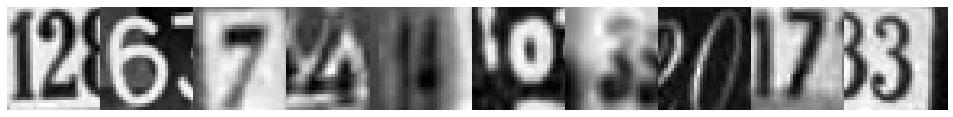

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 4.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train_o[0 : 10]))

Checking first image and label in training set
--------------------------------------------------------------------------------


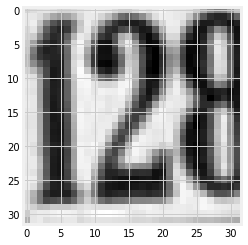

Label: 2


In [7]:
print('Checking first image and label in training set'); print('--'*40)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train_o[0])

Checking first image and label in validation set
--------------------------------------------------------------------------------


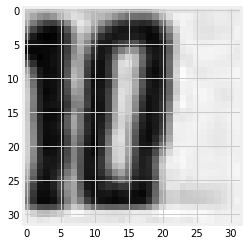

Label: 0


In [8]:
print('Checking first image and label in validation set'); print('--'*40)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val_o[0])

Checking first image and label in test set
--------------------------------------------------------------------------------


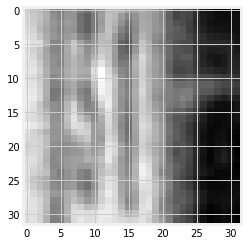

Label: 1


In [9]:
print('Checking first image and label in test set'); print('--'*40)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test_o[0])

<a id='flatten'></a>
### Flatten and normalize the images for Keras

In [10]:
print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [11]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('\n')
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000, 10)
y_val shape: (60000, 10)
y_test shape: (18000, 10)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


<a id='Baby'></a>
### Modelling - Baby sitting the learning process

#### Fully connected linear layer

In [0]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

#### ReLU

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

#### Softmax function

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

#### Cross entropy loss

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

#### NN class that enables the forward prop and backward propagation of the entire network

In [0]:
class NN():
    def __init__(self, lossfunc = CrossEntropy(), mode = 'train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

#### Update function SGD with momentum

In [0]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

#### Get minibatches

In [0]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

#### The training loop

In [0]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu = 0.9, X_val = None, y_val = None, Lambda = 0, verb = True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

#### Checking the accuracy of the model

In [0]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

#### Invoking all that we have created until now

In [0]:
# Invoking the model
## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb = True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes1 = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes1))

    nn, val_acc = train(nn, X_train, y_train_o, minibatch_size = 200, epoch = iterations, learning_rate = learning_rate,\
                      X_val = X_test, y_val = y_test_o, Lambda = Lambda, verb = verb)
    return val_acc

#### Double Check that the loss is reasonable : Disable the regularization

In [22]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3117883972138844 | Training Accuracy = 0.09335714285714286


0.09438888888888888

#### Now, lets crank up the Lambda(Regularization) and check what it does to our loss function

In [23]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3082000425724667 | Training Accuracy = 0.08478571428571428


0.08188888888888889

#### Now, lets overfit to a small subset of our dataset, in this case 20 images

In [24]:
X_train_subset = X_train[0:20]
y_train_subset = y_train_o[0:20]

X_train = X_train_subset
y_train_o = y_train_subset

X_train.shape, y_train_o.shape

((20, 1024), (20,))

#### Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off
In the code below:
* Take the first 20 examples
* turn off regularization(reg=0.0)
* use simple vanilla 'sgd'

In [25]:
%time
lr = 0.001
Lambda = 0
train_and_test_loop(5000, lr, Lambda)

CPU times: user 0 ns, sys: 8 µs, total: 8 µs
Wall time: 8.11 µs
Epoch 0/5000: Loss = 2.343525441008851 | Training Accuracy = 0.0
Epoch 50/5000: Loss = 1.9368840865311359 | Training Accuracy = 0.3
Epoch 100/5000: Loss = 1.8502138907049706 | Training Accuracy = 0.3
Epoch 150/5000: Loss = 1.795704759770493 | Training Accuracy = 0.35
Epoch 200/5000: Loss = 1.7505141963680764 | Training Accuracy = 0.4
Epoch 250/5000: Loss = 1.7098591715226046 | Training Accuracy = 0.45
Epoch 300/5000: Loss = 1.6720807405140872 | Training Accuracy = 0.45
Epoch 350/5000: Loss = 1.6364256819871694 | Training Accuracy = 0.5
Epoch 400/5000: Loss = 1.602489808977548 | Training Accuracy = 0.55
Epoch 450/5000: Loss = 1.5700278004175436 | Training Accuracy = 0.55
Epoch 500/5000: Loss = 1.5388749934942745 | Training Accuracy = 0.6
Epoch 550/5000: Loss = 1.5089113416081257 | Training Accuracy = 0.6
Epoch 600/5000: Loss = 1.480043412413456 | Training Accuracy = 0.6
Epoch 650/5000: Loss = 1.4521947854019437 | Training A

0.1381111111111111

#### Loading the original dataset again

In [26]:
h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


#### Start with small regularization and find learning rate that makes the loss go down.
* we start with Lambda(small regularization) = 1e-7
* we start with a small learning rate = 1e-7

In [27]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.317728157047642 | Training Accuracy = 0.104
Epoch 50/500: Loss = 2.3127425227478797 | Training Accuracy = 0.10471428571428572
Epoch 100/500: Loss = 2.3094828415428403 | Training Accuracy = 0.1055
Epoch 150/500: Loss = 2.307345836509397 | Training Accuracy = 0.10542857142857143
Epoch 200/500: Loss = 2.305942805671862 | Training Accuracy = 0.10428571428571429
Epoch 250/500: Loss = 2.3050204802732313 | Training Accuracy = 0.10395238095238095
Epoch 300/500: Loss = 2.3044129184583078 | Training Accuracy = 0.10254761904761905
Epoch 350/500: Loss = 2.3040111864235984 | Training Accuracy = 0.101
Epoch 400/500: Loss = 2.303743794017468 | Training Accuracy = 0.10019047619047619
Epoch 450/500: Loss = 2.3035638954300524 | Training Accuracy = 0.09911904761904762


0.09555555555555556

#### Lets try to train now with a value of learning rate 0.001

In [28]:
lr = 0.001
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3045206865294667 | Training Accuracy = 0.11473809523809524
Epoch 50/500: Loss = 2.259865884155515 | Training Accuracy = 0.20614285714285716
Epoch 100/500: Loss = 2.251416078728257 | Training Accuracy = 0.21633333333333332
Epoch 150/500: Loss = 2.2471058220607465 | Training Accuracy = 0.22138095238095237
Epoch 200/500: Loss = 2.2442164094973287 | Training Accuracy = 0.22454761904761905
Epoch 250/500: Loss = 2.2420426056295346 | Training Accuracy = 0.22678571428571428
Epoch 300/500: Loss = 2.240300552374621 | Training Accuracy = 0.22766666666666666
Epoch 350/500: Loss = 2.2388468080995563 | Training Accuracy = 0.22914285714285715
Epoch 400/500: Loss = 2.237598607772921 | Training Accuracy = 0.2300952380952381
Epoch 450/500: Loss = 2.2365039099696107 | Training Accuracy = 0.23076190476190475


0.21433333333333332

#### Hyperparameter Optimization



#### Running a finer search

In [29]:
import math
for k in range(1, 10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5, 2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: 0.18288888888888888, lr: 0.005248163657617819, Lambda: 64.48340786832672

Try 2/10: Best_val_acc: 0.2053888888888889, lr: 0.006679712019881258, Lambda: 0.3646857771377305

Try 3/10: Best_val_acc: 0.18827777777777777, lr: 0.0046008725625766725, Lambda: 0.03253300599381195

Try 4/10: Best_val_acc: 0.19616666666666666, lr: 0.004120077105146745, Lambda: 13.396751846027179

Try 5/10: Best_val_acc: 0.18988888888888888, lr: 0.0015322728061813945, Lambda: 0.05780821685783054

Try 6/10: Best_val_acc: 0.2031111111111111, lr: 0.003223010681924104, Lambda: 19.57233858291238

Try 7/10: Best_val_acc: 0.18738888888888888, lr: 0.007976192792141505, Lambda: 0.0004221599617830911

Try 8/10: Best_val_acc: 0.19411111111111112, lr: 0.009793789314692974, Lambda: 1.7025515288536694

Try 9/10: Best_val_acc: 0.19827777777777778, lr: 0.0023285365617220083, Lambda: 5.1261156557902146



##### Observation 2 - Baby sitting the neural network for SVHN
* Best accuracy achieved using this method after hyperparameter optimization: 21%.

<a id='BasicNN'></a>
### Modelling - Neural Network API

#### NN model, sigmoid activations, SGD optimizer

In [30]:
print('NN model with sigmoid activations'); print('--'*40)
# Initialize the neural network classifier
model1 = Sequential()

# Input Layer - adding input layer and activation functions sigmoid
model1.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model1.add(Activation('sigmoid'))

#Hidden Layer 1 - adding first hidden layer
model1.add(Dense(64))
# Adding activation function
model1.add(Activation('sigmoid'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model1.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model1.add(Activation('softmax'))

NN model with sigmoid activations
--------------------------------------------------------------------------------
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
__________________________________________________

In [32]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 64us/sample - loss: 2.3172 - acc: 0.1011 - val_loss: 2.3029 - val_acc: 0.1029
Epoch 2/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.3030 - acc: 0.1024 - val_loss: 2.3030 - val_acc: 0.1024
Epoch 3/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.3031 - acc: 0.0996 - val_loss: 2.3028 - val_acc: 0.0991
Epoch 4/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.3030 - acc: 0.0988 - val_loss: 2.3028 - val_acc: 0.1019
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.3029 - acc: 0.0998 - val_loss: 2.3027 - val_acc: 0.1009
Epoch 6/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3029 - val_acc: 0.0998
Epoch 7/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.3028 - acc: 0.1022 - val_l

In [33]:
print('Evaluate NN model with sigmoid activations'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2994 - acc: 0.1126
Validation accuracy: 11.26


#### NN model, sigmoid activations, SGD optimizer, changing learning rate

In [34]:
print('NN model with sigmoid activations - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.2991 - acc: 0.1169 - val_loss: 2.2993 - val_acc: 0.1169
Epoch 2/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2990 - acc: 0.1221 - val_loss: 2.2992 - val_acc: 0.1207
Epoch 3/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.2990 - acc: 0.1222 - val_loss: 2.2992 - val_acc: 0.1231
Epoch 4/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2990 - acc: 0.1248 - val_loss: 2.2992 - val_acc: 0.1244
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2990 - acc: 0.1266 - val_loss: 2.2992 - val_acc: 0.1257
Epoch 6/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2990 - acc: 0.1285 - val_l

In [35]:
print('Evaluate NN model with sigmoid activations - changing learning rate'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2988 - acc: 0.1307
Validation accuracy: 13.07


<a id='o3'></a>
##### Observation 3 - NN model with sigmoid activations
* Validation score is very low, changing learning rate further reduces it.
* Optimizing the network in order to better learn the patterns in the dataset.
* Best model out of the above is the one with lower learning rate using SGD optimizer and sigmoid activations.
* Next, let's use relu activations and see if the score improves.

#### NN model, relu activations, SGD optimizer

In [36]:
%time
print('NN model with relu activations and sgd optimizers'); print('--'*40)
# Initialize the neural network classifier
model2 = Sequential()

# Input Layer - adding input layer and activation functions relu
model2.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model2.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model2.add(Dense(64))
# Adding activation function
model2.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model2.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model2.add(Activation('softmax'))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.68 µs
NN model with relu activations and sgd optimizers
--------------------------------------------------------------------------------


In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
________________________________________________

In [38]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.3001 - acc: 0.1166 - val_loss: 2.2903 - val_acc: 0.1328
Epoch 2/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2854 - acc: 0.1465 - val_loss: 2.2786 - val_acc: 0.1673
Epoch 3/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2722 - acc: 0.1781 - val_loss: 2.2643 - val_acc: 0.1904
Epoch 4/100
42000/42000 [==============================] - 1s 25us/sample - loss: 2.2561 - acc: 0.2140 - val_loss: 2.2467 - val_acc: 0.2199
Epoch 5/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.2369 - acc: 0.2507 - val_loss: 2.2263 - val_acc: 0.2579
Epoch 6/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.2128 - acc: 0.2883 - val_loss: 2.1973 - val_acc: 0.3150
Epoch 7/100
42000/42000 [==============================] - 1s 26us/sample - loss: 2.1828 - acc: 0.3158 - val_l

In [39]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7015 - acc: 0.7965
Validation accuracy: 79.65


#### NN model, relu activations, SGD optimizer, changing learning rate

In [40]:
%time
print('NN model with relu activations and sgd optimizers - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 15.5 µs
NN model with relu activations and sgd optimizers - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.6704 - acc: 0.8051 - val_loss: 0.6922 - val_acc: 0.8003
Epoch 2/100
42000/42000 [==============================] - 1s 25us/sample - loss: 0.6680 - acc: 0.8054 - val_loss: 0.6917 - val_acc: 0.7996
Epoch 3/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.6679 - acc: 0.8055 - val_loss: 0.6901 - val_acc: 0.8005
Epoch 4/100
42000/42000 [==============================] - 1s 26us/sample - loss: 0.6671 - acc: 0.8058 - val_loss: 0.6899 - val_acc: 0.7997
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 0.6665 - acc: 0.8065 - val_loss: 0.6900 - val_acc: 0.8002
Epoch 6/100
42000/42000 [=

In [41]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6611 - acc: 0.8088
Validation accuracy: 80.88


#### NN model, relu activations, adam optimizer

In [42]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 34us/sample - loss: 3.3943 - acc: 0.1031 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/100
42000/42000 [==============================] - 1s 30us/sample - loss: 2.3013 - acc: 0.1004 - val_loss: 2.3027 - val_acc: 0.1014
Epoch 3/100
42000/42000 [==============================] - 1s 29us/sample - loss: 2.2895 - acc: 0.1191 - val_loss: 2.2743 - val_acc: 0.1331
Epoch 4/100
42000/42000 [==============================] - 1s 31us/sample - loss: 2.2683 - acc: 0.1293 - val_loss: 2.2518 - val_acc: 0.1432
Epoch 5/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.1576 - acc: 0.1853 - val_loss: 2.0355 - val_acc: 0.2498
Epoch 6/100
42000/42000 [==============================

In [43]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 47us/sample - loss: 1.0037 - acc: 0.6911
Validation accuracy: 69.11


#### NN model, relu activations, adam optimizer, changing learning rate

In [44]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 30us/sample - loss: 0.9207 - acc: 0.7166 - val_loss: 0.9223 - val_acc: 0.7184
Epoch 2/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.9098 - acc: 0.7203 - val_loss: 0.9175 - val_acc: 0.7193
Epoch 3/100
42000/42000 [==============================] - 1s 27us/sample - loss: 0.9100 - acc: 0.7193 - val_loss: 0.9187 - val_acc: 0.7174
Epoch 4/100
42000/42000 [==============================] - 1s 29us/sample - loss: 0.9088 - acc: 0.7202 - val_loss: 0.9171 - val_acc: 0.7187
Epoch 5/100
42000/42000 [==============================] - 1s 26us/sample - loss: 0.9080 - acc: 0.7191 - val_loss: 0.9185 - val_acc: 0.7184
Epoch 6/100
42000/42000 [==========================

In [45]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9003 - acc: 0.7231
Validation accuracy: 72.31


<a id='o4'></a>
##### Observation 4 - NN model with relu activations
* Improves the scores considerably.
* Best accuracy achieved till now is using relu activations, SGD optimizer, changing learning rate to 0.001.
* Next, let's try and change the number of activators and see if the score improves.

#### NN model, relu activations, changing number of activators, SGD optimizers

In [46]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [47]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [48]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 30us/sample - loss: 2.2970 - acc: 0.1352 - val_loss: 2.2856 - val_acc: 0.1681
Epoch 2/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.2796 - acc: 0.1758 - val_loss: 2.2716 - val_acc: 0.2027
Epoch 3/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.2635 - acc: 0.2046 - val_loss: 2.2535 - val_acc: 0.2214
Epoch 4/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.2420 - acc: 0.2349 - val_loss: 2.2278 - val_acc: 0.2569
Epoch 5/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.2120 - acc: 0.2681 - val_loss: 2.1917 - val_acc: 0.2880
Epoch 6/100
42000/42000 [==============================] - 1s 27us/sample - loss: 2.1718 - acc: 0.2916 - val_loss: 2.1462 - val_acc: 0.3122
Epoch 7/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.1214 - acc: 0.3206 - val_l

In [49]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6550 - acc: 0.8033
Validation accuracy: 80.33


#### NN model, relu activations, changing number of activators, Adam optimizers

In [50]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 32us/sample - loss: 0.9431 - acc: 0.7111 - val_loss: 0.7650 - val_acc: 0.7681
Epoch 2/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.7697 - acc: 0.7615 - val_loss: 0.8645 - val_acc: 0.7370
Epoch 3/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.7513 - acc: 0.7701 - val_loss: 0.7942 - val_acc: 0.7514
Epoch 4/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.7354 - acc: 0.7748 - val_loss: 0.7716 - val_acc: 0.7655
Epoch 5/100
42000/42000 [==============================] - 1s 28us/sample - loss: 0.7217 - acc: 0.7776 - val_loss: 0.7024 - val_acc: 0.7878
Epoch 6/100
42000/42000 [==============================] - 1s 29us/sample - loss: 0.6969 - acc: 0.7889 - val_loss: 0.7223 - val_acc: 0.7825
Epoch 7/100
42000/42000 [==============================] - 1s 29us/sample - loss: 0.6787 - acc: 0.7916 - val_l

In [51]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3539 - acc: 0.9066
Validation accuracy: 90.66


<a id='o5'></a>
##### Observation 5 - NN model with relu activations and changing activators
* Adding relu activations and changing activators results in improvement of score.
* Best accuracy achieved till now is using relu activations, changing number of activators and Adam optimizers with a learning rate of 0.001
* Next, let's try adding weight initilization.

<a id='Weight'></a>
### With Weight Initializers
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree.

#### NN model, relu activations, SGD optimizers with weight initializers

In [52]:
print('NN model with weight initializers'); print('--'*40)
# Initialize the neural network classifier
model4 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model4.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model4.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model4.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model4.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model4.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('softmax'))

NN model with weight initializers
--------------------------------------------------------------------------------


In [53]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [54]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 31us/sample - loss: 2.3023 - acc: 0.1175 - val_loss: 2.2772 - val_acc: 0.1445
Epoch 2/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.2583 - acc: 0.1590 - val_loss: 2.2352 - val_acc: 0.1811
Epoch 3/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.2025 - acc: 0.1988 - val_loss: 2.1630 - val_acc: 0.2169
Epoch 4/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.1205 - acc: 0.2455 - val_loss: 2.0677 - val_acc: 0.2791
Epoch 5/100
42000/42000 [==============================] - 1s 28us/sample - loss: 2.0151 - acc: 0.3002 - val_loss: 1.9792 - val_acc: 0.2936
Epoch 6/100
42000/42000 [==============================] - 1s 28us/sample - loss: 1.9102 - acc: 0.3502 - val_loss: 1.8788 - val_acc: 0.3721
Epoch 7/100
42000/42000 [==============================] - 1s 31us/sample - loss: 1.8119 - acc: 0.3987 - val_l

In [55]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5648 - acc: 0.8295
Validation accuracy: 82.95


#### NN model, relu activations, Adam optimizers with weight initializers

In [56]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 33us/sample - loss: 0.8991 - acc: 0.7259 - val_loss: 0.7777 - val_acc: 0.7567
Epoch 2/100
42000/42000 [==============================] - 1s 30us/sample - loss: 0.7556 - acc: 0.7651 - val_loss: 0.7145 - val_acc: 0.7837
Epoch 3/100
42000/42000 [==============================] - 1s 30us/sample - loss: 0.7233 - acc: 0.7769 - val_loss: 0.7429 - val_acc: 0.7717
Epoch 4/100
42000/42000 [==============================] - 1s 31us/sample - loss: 0.7134 - acc: 0.7808 - val_loss: 0.7203 - val_acc: 0.7836
Epoch 5/100
42000/42000 [==============================] - 1s 30us/sample - loss: 0.7006 - acc: 0.7834 - val_loss: 0.7579 - val_acc: 0.7643
Epoch 6/100
42000/42000 [==============================] - 1s 29us/sample - loss: 0.6854 - acc: 0.7876 - val_loss: 0.6947 - val_acc: 0.7862
Epoch 7/100
42000/42000 [==============================] - 1s 31us/sample - loss: 0.6375 - acc: 0.8048 - val_l

In [57]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4037 - acc: 0.8873
Validation accuracy: 88.73


<a id='o6'></a>
##### Observation 6 - Weight initializers
* Adding weight initialiers didn't result in improvement of score.
* relu activations, changing number of activators, Adam optimizers gives the best score out of the ones tried as of now.
* Next, let's try batch normalization.

<a id='Batch'></a>
### Batch Normalization
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective. Normalize each mini-batch before nonlinearity.

#### NN model, relu activations, SGD optimizers with weight initializers and batch normalization

In [58]:
print('NN model with batch normalization'); print('--'*40)
# Initialize the neural network classifier
model5 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model5.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model5.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model5.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model5.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model5.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model5.add(Activation('softmax'))

NN model with batch normalization
--------------------------------------------------------------------------------


In [59]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [60]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 58us/sample - loss: 2.3150 - acc: 0.1844 - val_loss: 2.2163 - val_acc: 0.1867
Epoch 2/100
42000/42000 [==============================] - 2s 48us/sample - loss: 1.8823 - acc: 0.3717 - val_loss: 1.8685 - val_acc: 0.3833
Epoch 3/100
42000/42000 [==============================] - 2s 47us/sample - loss: 1.6338 - acc: 0.4850 - val_loss: 1.6083 - val_acc: 0.4873
Epoch 4/100
42000/42000 [==============================] - 2s 48us/sample - loss: 1.4471 - acc: 0.5612 - val_loss: 1.4532 - val_acc: 0.5435
Epoch 5/100
42000/42000 [==============================] - 2s 47us/sample - loss: 1.3017 - acc: 0.6110 - val_loss: 1.2819 - val_acc: 0.6060
Epoch 6/100
42000/42000 [==============================] - 2s 48us/sample - loss: 1.1888 - acc: 0.6459 - val_loss: 1.2110 - val_acc: 0.6357
Epoch 7/100
42000/42000 [==============================] - 2s 51us/sample - loss: 1.0931 - acc: 0.6720 - val_l

In [61]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 68us/sample - loss: 0.7381 - acc: 0.8078
Validation accuracy: 80.78


#### NN model, relu activations, Adam optimizers with weight initializers and batch normalization

In [62]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 62us/sample - loss: 0.7504 - acc: 0.7711 - val_loss: 3.2994 - val_acc: 0.3926
Epoch 2/100
42000/42000 [==============================] - 2s 55us/sample - loss: 0.5840 - acc: 0.8120 - val_loss: 1.2989 - val_acc: 0.5782
Epoch 3/100
42000/42000 [==============================] - 2s 50us/sample - loss: 0.5254 - acc: 0.8286 - val_loss: 1.5073 - val_acc: 0.5588
Epoch 4/100
42000/42000 [==============================] - 2s 50us/sample - loss: 0.4785 - acc: 0.8432 - val_loss: 1.4805 - val_acc: 0.5900
Epoch 5/100
42000/42000 [==============================] - 2s 48us/sample - loss: 0.4628 - acc: 0.8490 - val_loss: 1.5200 - val_acc: 0.5520
Epoch 6/100
42000/42000 [==============================] - 2s 49us/sample - loss: 0.4416 - acc: 0.8556 - val_loss: 1.1569 - val_acc: 0.6578
Epoch 7/100
42000/42000 [==============================] - 2s 49us/sample - loss: 0.4216 - acc: 0.8632 - val_l

In [63]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 68us/sample - loss: 1.1002 - acc: 0.7901
Validation accuracy: 79.01


<a id='o7'></a>
##### Observation 7 - Batch Normalization
* Batch normalization didn't result in improvement of score.
* Relu activations, changing number of activators, Adam optimizers achieved the best score.
* Next, let's try batch normalization with dropout.

<a id='Dropout'></a>
### Dropout

#### NN model, relu activations, SGD optimizers with weight initializers,  batch normalization and dropout

In [64]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
# Initialize the neural network classifier
model6 = Sequential()
# Input Layer - adding input layer and activation functions relu and weight initializer
model6.add(Dense(512, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model6.add(BatchNormalization()) 
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 1 - adding first hidden layer
model6.add(Dense(256, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 2 - adding second hidden layer
model6.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 3 - adding third hidden layer
model6.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 4 - adding fourth hidden layer
model6.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

# Output Layer - adding output layer which is of 10 nodes (digits)
model6.add(Dense(10, kernel_initializer = 'he_normal',bias_initializer = 'he_uniform'))
# Adding activation function
model6.add(Activation('softmax'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------


In [65]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_21 (Activation)   (None, 256)              

In [66]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model6.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 71us/sample - loss: 2.6054 - acc: 0.1100 - val_loss: 2.3237 - val_acc: 0.1209
Epoch 2/100
42000/42000 [==============================] - 2s 55us/sample - loss: 2.4142 - acc: 0.1332 - val_loss: 2.2139 - val_acc: 0.2095
Epoch 3/100
42000/42000 [==============================] - 2s 56us/sample - loss: 2.3151 - acc: 0.1548 - val_loss: 2.1209 - val_acc: 0.2677
Epoch 4/100
42000/42000 [==============================] - 2s 56us/sample - loss: 2.2315 - acc: 0.1876 - val_loss: 2.0331 - val_acc: 0.3157
Epoch 5/100
42000/42000 [==============================] - 3s 60us/sample - loss: 2.1531 - acc: 0.2181 - val_loss: 1.9579 - val_acc: 0.3408
Epoch 6/100
42000/42000 [==============================] - 2s 56us/sample - loss: 2.0815 - acc: 0.2495 - val_loss: 1.8626 - val_acc: 0.3965
Epoch 7/100
42000/42000 [==============================] - 2s 56us/sample - loss: 2.0079 - acc: 0.2789 - val_l

In [67]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4758 - acc: 0.8560
Validation accuracy: 85.6


In [68]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model6.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 75us/sample - loss: 1.0483 - acc: 0.6722 - val_loss: 1.5585 - val_acc: 0.4775
Epoch 2/100
42000/42000 [==============================] - 2s 58us/sample - loss: 0.9086 - acc: 0.7194 - val_loss: 1.3776 - val_acc: 0.5337
Epoch 3/100
42000/42000 [==============================] - 2s 59us/sample - loss: 0.8480 - acc: 0.7403 - val_loss: 1.0837 - val_acc: 0.6561
Epoch 4/100
42000/42000 [==============================] - 3s 62us/sample - loss: 0.7984 - acc: 0.7575 - val_loss: 1.1266 - val_acc: 0.6141
Epoch 5/100
42000/42000 [==============================] - 2s 58us/sample - loss: 0.7714 - acc: 0.7648 - val_loss: 1.2182 - val_acc: 0.5853
Epoch 6/100
42000/42000 [==============================] - 3s 60us/sample - loss: 0.7336 - acc: 0.7772 - val_loss: 1.0197 - val_acc: 0.6763
Epoch 7/100
42000/42000 [==============================] - 2s 57us/sample - loss: 0.7149 - acc: 0.7826 - val_l

In [69]:
print('NN model with dropout - adam optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - adam optimizer
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5253 - acc: 0.8297
Validation accuracy: 82.97


<a id='o8'></a>
##### Observation 8 - Batch Normalization and Dropout
* Didn't result in any improvement of score.
* NN model, relu activations, SGD optimizers with weight initializers and batch normalization is still the best model.
* Next, let's try batch normalization and dropout with adam optimizer.

<a id='Prediction'></a>
### Prediction on test dataset using Model 3 - relu activations, Adam optimizers

In [70]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [71]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 39us/sample - loss: 2.2450 - acc: 0.1494 - val_loss: 1.9481 - val_acc: 0.3398
Epoch 2/100
42000/42000 [==============================] - 1s 30us/sample - loss: 1.5502 - acc: 0.4844 - val_loss: 1.3632 - val_acc: 0.5493
Epoch 3/100
42000/42000 [==============================] - 1s 29us/sample - loss: 1.2826 - acc: 0.5840 - val_loss: 1.1971 - val_acc: 0.6190
Epoch 4/100
42000/42000 [==============================] - 1s 29us/sample - loss: 1.1456 - acc: 0.6382 - val_loss: 1.0864 - val_acc: 0.6639
Epoch 5/100
42000/42000 [==============================] - 1s 29us/sample - loss: 1.0588 - acc: 0.6704 - val_loss: 1.0618 - val_acc: 0.6653
Epoch 6/100
42000/42000 [==============================] - 1s 29us/sample - loss: 1.0035 - acc: 0.6882 - val_loss: 0.9490 - val_acc: 0.7054
Epoch 7/100
42000/42000 [==============================] - 1s 30us/sample - loss: 0.9524 - acc: 0.7060 - val_l

In [72]:
print('NN with batch normalization'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3852 - acc: 0.8892
Validation accuracy: 88.92


In [73]:
print('Testing the model on test dataset')
predictions = model3.predict_classes(X_test)
score = model3.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
18000/18000 [==============================] - 1s 52us/sample - loss: 0.6316 - acc: 0.8357
Test loss : 0.6316036958562004
Test accuracy : 0.8357222


In [74]:
print('Classification Report'); print('--'*40)
print(classification_report(y_test_o, predictions))

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1814
           1       0.85      0.86      0.86      1828
           2       0.86      0.85      0.86      1803
           3       0.79      0.79      0.79      1719
           4       0.86      0.88      0.87      1812
           5       0.76      0.83      0.80      1768
           6       0.83      0.81      0.82      1832
           7       0.91      0.85      0.88      1808
           8       0.80      0.79      0.80      1812
           9       0.84      0.82      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



Visualizing the confusion matrix


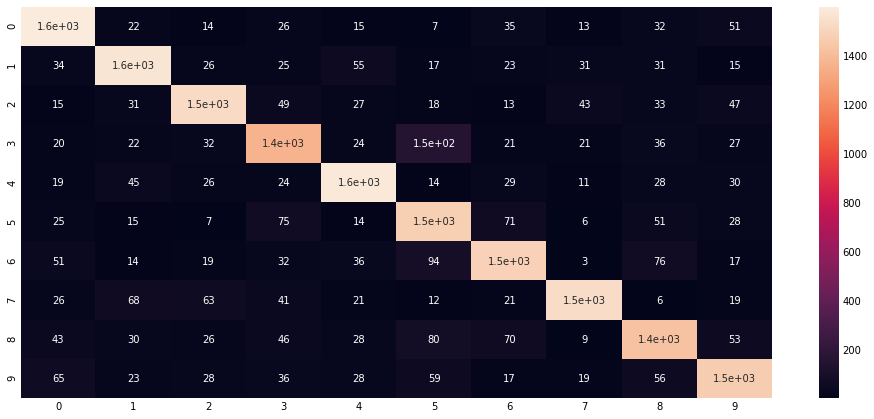

In [75]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True)

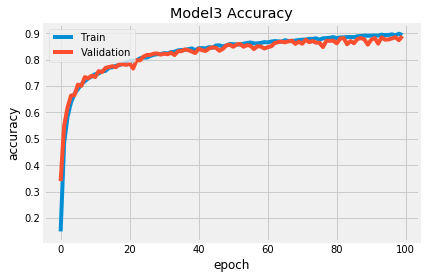

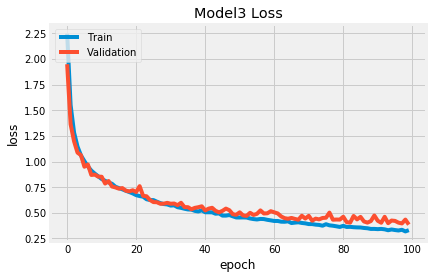

In [76]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [77]:
model3.predict_classes(X_test)[5]

9

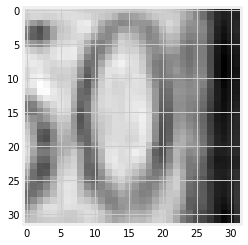

In [78]:
#Showing the image
plt.imshow(X_test[20].reshape(32, 32), cmap = 'gray')

In [79]:
model3.predict_classes(X_test)[20]

0

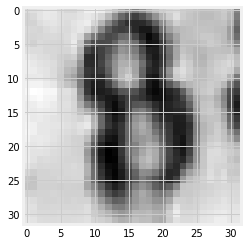

In [82]:
plt.imshow(X_test[10].reshape(32, 32), cmap = 'gray')

In [83]:
model3.predict_classes(X_test)[10]

9

<a id='Conclusion'></a>
### Conclusion
Evaluated the accuracy using two methods i.e. baby sitting the NN and NN through API. Followed all the required steps starting with loading the datasets to performing hyperparameter optimization and running a finer search by using a finer range. Explored different options in optimizers, number of activators, learning rate and activation methods in NN through API. Found that baby sitting process achieved the best accuracy of 21% using hyper parameter optimization. It might have been further improved but that's the trade off vs time taken to run the script. NN through API method achieved best accuracy of 90% on validation set. Also printed the classification report, visualized the confusion matrix and summarized history for accuracy and loss.